In [1]:
import sys
sys.path.append("../")
sys.path.append("../../src")
sys.path.append("../../")

from train import Trainer

import numpy as np
import matplotlib.pyplot as plt
from nn.net import Net, ResNet
from data.plot_light_curve import plot_curves

from config import *
import torch
import random

from train import Trainer

from src.config import Config, DataConfig, FilterConfig, AugmentationConfig

def get_new_net(cfg):
    seed = np.random.randint(1000000)
    np.random.seed(seed)
    torch.manual_seed(seed)
    random.seed(seed)
    cfg.seed = seed

    # device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
    cfg.net_config.name = f"{cfg.net_config.name}_{seed}"
    # net = ResNet(net_cfg.n_classes, device=device, name=net_cfg.name)
    net = Net(cfg.net_config)

    return net

def load_net(cfg, seed, checkpoint="latest"):
    np.random.seed(seed)
    torch.manual_seed(seed)
    random.seed(seed)
    cfg.seed = seed
    
    # device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
    cfg.net_config.name = f"{cfg.net_config.name}_{seed}"
    # net = ResNet(net_cfg.n_classes, device=device, name=net_cfg.name)
    net = Net(cfg.net_config)
    net.load(checkpoint)

    return net

# First Attempts

## Test train on synthetic

In [3]:
trainer = Trainer(net, sampler=False)

Folder C:/Users/Kyselica/Desktop/kyselica/classification_of_light_curves/../artificial_data/data/all:  20%|██        | 1/5 [00:01<00:04,  1.20s/it]c:\Users\Kyselica\Desktop\kyselica\classification_of_light_curves\src\notebooks\..\data\data_load.py:22: RuntimeWarning: divide by zero encountered in log10
  arr = -2.5 * np.log10(arr)
Folder C:/Users/Kyselica/Desktop/kyselica/classification_of_light_curves/../artificial_data/data/all: 100%|██████████| 5/5 [00:05<00:00,  1.16s/it]


(1800, 300)
(1800, 300)
(1800, 300)
(1800, 300)
(1800, 300)
label: atlasv -> 1620 training examples, 180 testing examples
label: cz3 -> 1173 training examples, 130 testing examples
label: falcon9 -> 1152 training examples, 128 testing examples
label: globalstar -> 955 training examples, 106 testing examples
label: h2a -> 1289 training examples, 143 testing examples
Training set: 50000
Validation set: 50000


In [4]:
trainer.train(100, print_on=False, save_interval=20, tensorboard_on=True)

Training: 100%|██████████| 100/100 [01:54<00:00,  1.15s/it]


In [5]:
trainer.evaluate(LABELS)

0 atlasv
1 cz3
2 falcon9
3 globalstar
4 h2a
Train:
	Loss: 0.00023927600113650866
	Acc: 97.616
Validation:
	Loss: 0.0004295219167308759
	Acc: 96.654
-----------------------------------------

        Label  atlasv   cz3  falcon9  globalstar   h2a
0      atlasv    9441   559        0           0     0
1         cz3       1  9634      342          23     0
2     falcon9       0    46     9919           6    29
3  globalstar       0    48        0        9870    82
4         h2a       0    82      110         345  9463

-----------------------------------------

              atlasv        cz3    falcon9  globalstar       h2a
Precision  94.410000  96.340000  99.190000   98.700000  94.63000
Recall     99.989409  92.911563  95.641693   96.349082  98.84061

-----------------------------------------



In [9]:
DATA_PATH = "C:/Users/Kyselica/Desktop/kyselica/classification_of_light_curves/resources/6classes"
trainer.load_data_from_file(DATA_PATH)

In [8]:
trainer.train_set.data = trainer.train_set.data[trainer.train_set.labels != 1]
trainer.train_set.labels = trainer.train_set.labels[trainer.train_set.labels != 1]
trainer.train_set.labels[trainer.train_set.labels != 0] = trainer.train_set.labels[trainer.train_set.labels != 0] - 1
 

In [5]:
from data.data_load import load_data
from data.filters import filter_data

real_labels = ["falcon_9",
          "atlas_5",
          "h-2a",
          "globalstar",
          "cz-3"
]
labled_data = load_data(PACKAGE_PATH + "/resources/Fall_2021_2", labels=real_labels, convert_to_mag=False)

filtered_data = filter_data(labled_data)

Folder C:/Users/Kyselica/Desktop/kyselica/classification_of_light_curves/resources/Fall_2021_2: 100%|██████████| 495/495 [00:01<00:00, 433.70it/s]


(9134, 300)
(20844, 300)
(1907, 300)
(27295, 300)
(2478, 300)


In [6]:
new_data = {}
for key in filtered_data:
    new_data[key.replace("_", "").replace("-", "").replace("5", "v")] = filtered_data[key]

In [8]:
new_data.keys(), LABELS, filtered_data.keys()

(dict_keys(['atlasv', 'cz3', 'falcon9', 'globalstar', 'h2a']),
 ['atlasv', 'cz3', 'falcon9', 'globalstar', 'h2a'],
 dict_keys(['atlas_5', 'cz-3', 'falcon_9', 'globalstar', 'h-2a']))

In [14]:
trainer.train_set = train_set
# trainer.val_set = val_set

## Trained on real data with 5 classes

In [54]:
cfg = Config()
cfg.data_config.path = f"{PACKAGE_PATH}/resources/real_mmt"
# cfg.net_config.device = "cpu"
cfg.data_config.labels = ["cz_3", "falcon_9", "atlas_5",  "h2a", "globalstar"]
cfg.data_config.convert_to_mag = False
cfg.net_config.name = "RTRT_v2_sampler"
cfg.net_config.save_path = "C:/Users/Kyselica/Desktop/kyselica/classification_of_light_curves/resources/models/5class"
cfg.data_config.validation_split = 0.1


In [62]:
net = get_new_net(cfg)
trainer = Trainer(net)
trainer.load_data(cfg.data_config)

middle_dim 370


Folder C:/Users/Kyselica/Desktop/kyselica/classification_of_light_curves/resources/real_mmt: 100%|██████████| 5/5 [00:00<00:00, 35.30it/s]

Label: atlas_5 17080 examples.
Label: cz_3 39000 examples.
Label: falcon_9 5655 examples.
Label: globalstar 42172 examples.
Label: h2a 5860 examples.


[1.516  0.9578 1.516  ... 1.516  0.9578 3.813 ]
[1.516  0.243  3.813  ... 0.9578 0.9578 3.813 ]
Training set: 25000
Validation set: 25000


In [63]:
trainer.add_sampler()

In [64]:
trainer.train(101, 128,tensorboard_on=True, save_interval=50, print_on=False)
net.save()

Training: 100%|██████████| 101/101 [01:21<00:00,  1.24it/s]


In [61]:
trainer.evaluate(cfg.data_config.labels)

0 cz_3
1 falcon_9
2 atlas_5
3 h2a
4 globalstar
Train:
	Loss: 0.0032061392752120027
	Acc: 84.816
Validation:
	Loss: 0.015361303875833005
	Acc: 48.088
-----------------------------------------

        Label  cz_3  falcon_9  atlas_5   h2a  globalstar
0        cz_3  1514      1966      401   998         121
1    falcon_9   970      2592      446   876         116
2     atlas_5   594       520     2472   768         646
3         h2a   774       998      546  2518         164
4  globalstar   611       264      815   384        2926

-----------------------------------------

               cz_3   falcon_9    atlas_5       h2a  globalstar
Precision  30.28000  51.840000  49.440000  50.36000   58.520000
Recall     33.92337  40.883281  52.820513  45.41847   73.647118

-----------------------------------------



## Training on real using augmentation

In [3]:
net, seed = get_new_net()
trainer = Trainer(net, sampler=False)
DATA_PATH = "C:/Users/Kyselica/Desktop/kyselica/classification_of_light_curves/resources/6classes"
print(len(trainer.train_set))
trainer.load_data_from_file(DATA_PATH)
print(len(trainer.train_set))
remove_titan_class(trainer)

SEED: 898468 

cuda:0
middle_dim 370


Folder C:/Users/Kyselica/Desktop/kyselica/classification_of_light_curves/../artificial_data/data/all:  20%|██        | 1/5 [00:01<00:04,  1.02s/it]c:\Users\Kyselica\Desktop\kyselica\classification_of_light_curves\src\notebooks\..\data\data_load.py:22: RuntimeWarning: divide by zero encountered in log10
  arr = -2.5 * np.log10(arr)
Folder C:/Users/Kyselica/Desktop/kyselica/classification_of_light_curves/../artificial_data/data/all: 100%|██████████| 5/5 [00:04<00:00,  1.04it/s]


label: atlasv -> 1620 training examples, 180 testing examples
label: cz3 -> 1620 training examples, 180 testing examples
label: falcon9 -> 1620 training examples, 180 testing examples
label: globalstar -> 1620 training examples, 180 testing examples
label: h2a -> 1620 training examples, 180 testing examples


c:\Users\Kyselica\Desktop\kyselica\classification_of_light_curves\src\notebooks\..\nn\dataset.py:22: RuntimeWarning: invalid value encountered in divide
  d[d!=-1] = (d[d!=-1] - min_value[i]) / diff


Training set: 50000
Validation set: 50000
50000
58111


In [4]:
print(len(trainer.train_set))


55736


In [4]:
from nn.dataset import create_datasets, AugmentedBalancedDataset, NetDataset

dataset_args = {
    "max_noise": 0.05, 
    "num_gaps": 2, "min_gap_len": 5,
    "max_gap_len": 10, 
    "gap_prob": 0.01, 
    "use_original_data": True, 
    "min_num_examples": 10000
}

# train_set, val_set = create_datasets(new_data, LABELS, validation_split=0.1, output_folder=None, 
#                                 dataset_class=NetDataset, aditional_dataset_args={})

train_set = AugmentedBalancedDataset(trainer.train_set.data, trainer.train_set.labels, **dataset_args)

In [6]:
# trainer.train_set = train_set

In [7]:
trainer.train(301, print_on=False, save_interval=100, tensorboard_on=True)
trainer.evaluate(LABELS)

Training: 100%|██████████| 301/301 [05:44<00:00,  1.15s/it]


0 atlasv
1 cz3
2 falcon9
3 globalstar
4 h2a
Train:
	Loss: 0.002063445328441889
	Acc: 90.4765322233386
Validation:
	Loss: 0.0027077191074343283
	Acc: 88.4329563812601
-----------------------------------------

        Label  atlasv  cz3  falcon9  globalstar   h2a
0      atlasv    1990   16       39          35    39
1         cz3     116   64        6           7     4
2     falcon9     162    8      649          16    54
3  globalstar      44    4        5         185    14
4         h2a      61   10       47          29  2586

-----------------------------------------

              atlasv        cz3    falcon9  globalstar        h2a
Precision  93.912223  32.487310  73.003375   73.412698  94.621295
Recall     83.860093  62.745098  86.997319   68.014706  95.884316

-----------------------------------------



In [12]:
print(net.parameters)

<bound method Module.parameters of Net(
  (layers): Sequential(
    (0): Conv1d(1, 8, kernel_size=(5,), stride=(2,), padding=(2,))
    (1): LeakyReLU(negative_slope=0.01)
    (2): Dropout(p=0.2, inplace=False)
    (3): Conv1d(8, 16, kernel_size=(3,), stride=(1,), padding=(1,))
    (4): LeakyReLU(negative_slope=0.01)
    (5): Dropout(p=0.2, inplace=False)
    (6): MaxPool1d(kernel_size=5, stride=4, padding=1, dilation=1, ceil_mode=False)
    (7): Flatten(start_dim=1, end_dim=-1)
    (8): Dropout(p=0.2, inplace=False)
    (9): Linear(in_features=592, out_features=128, bias=True)
    (10): LeakyReLU(negative_slope=0.01)
    (11): Dropout(p=0.2, inplace=False)
    (12): Linear(in_features=128, out_features=5, bias=True)
  )
  (logsoftmax): LogSoftmax(dim=1)
)>


## Correct data

In [1]:
import sys
sys.path.append("../")
sys.path.append("../../src")
sys.path.append("../../")

from train import Trainer

import numpy as np
import matplotlib.pyplot as plt
from nn.net import Net, ResNet
from data.plot_light_curve import plot_curves

from config import *
import torch
import random

from src.config import Config, DataConfig, FilterConfig, AugmentationConfig

def get_new_net(cfg):
    seed = np.random.randint(1000000)
    np.random.seed(seed)
    torch.manual_seed(seed)
    random.seed(seed)
    cfg.seed = seed

    # device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
    cfg.net_config.name = f"{cfg.net_config.name}_{seed}"
    # net = ResNet(net_cfg.n_classes, device=device, name=net_cfg.name)
    net = Net(cfg.net_config)

    return net

In [46]:
cfg = Config()

In [47]:
cfg.data_config.path = f"{PACKAGE_PATH}/resources/synthetic/one_color/obs_15_75"
# cfg.net_config.device = "cpu"
cfg.data_config.labels = ["cz_3", "falcon_9", "atlas_5",  "h2a", "globalstar"]
cfg.data_config.convert_to_mag = False
cfg.net_config.name = "TSTS_obs_15_75_v1"
cfg.net_config.save_path = "C:/Users/Kyselica/Desktop/kyselica/classification_of_light_curves/resources/models/5class"
augmentation_cfg = AugmentationConfig(
    min_examples = 5000,
    roll=True,
    add_gaps=True,
    add_noise=True,
    max_noise=.03,
    keep_original=False,
    num_gaps = 2,
    gap_prob = .2,
    min_gap_len = 5,
    max_gap_len = 15
)
cfg.data_config.augmentation = augmentation_cfg
# cfg.data_config.filter = FilterConfig()
# cfg.data_config.filter.n_bins = 30
# cfg.data_config.filter.n_gaps = 2
# cfg.data_config.filter.gap_size = 2
# cfg.data_config.filter.rms_ratio = .0
# cfg.data_config.filter.non_zero_ratio = 0.2

In [42]:
net = get_new_net(cfg)
with open(f"{PACKAGE_PATH}/output/configurations/{net.name}.json", "w") as f:
    print(cfg.to_json(), file=f)

middle_dim 370


In [18]:
seed = net.load(checkpoint=8)
# cfg.seed = seed
# np.random.seed(seed)
# torch.manual_seed(seed)
# random.seed(seed)# 

In [12]:
trainer.net = net

In [43]:
trainer = Trainer(net, sampler=True)

In [44]:
cfg.data_config.validation_split = 0.1
trainer.load_data(cfg.data_config)

Folder C:/Users/Kyselica/Desktop/kyselica/classification_of_light_curves/resources/synthetic/one_color/obs_15_75: 100%|██████████| 5/5 [00:00<00:00, 557.01it/s]


Label: atlas_5 1160 examples.
Label: cz_3 1160 examples.
Label: falcon_9 1160 examples.
Label: globalstar 1160 examples.
Label: h2a 1160 examples.
[2492. 2515.  126. 1743. 1761. 1611. 1065.  126. 2241.  274.  798.  887.
  128. 1484. 3751.  925. 1092. 1826. 2966.  973. 2433.  913.  443. 1549.
 1655.  126. 3599. 1624.  127. 2038.  872. 1917. 1586. 1702. 2182. 3527.
 2288.  117. 1626. 1108.  654. 1279.  701. 1532.  494. 1549. 2484. 1022.
 1606. 1355.  798. 2460. 1077.  122.  127. 2388. 1976. 1761. 1828. 1973.
 1279. 2088.  817. 1681.  123.  808. 1590. 3253. 3757.  122. 1299.  768.
  972.  554.  768.  141. 2785. 1735. 2531. 2633. 1954. 1399.  847.  910.
 2286. 3599.  554.  554. 1253. 2222. 1167. 1550.  942. 2222. 1105. 3253.
  654. 2484. 1270. 3631.  816. 1549. 2204. 1043.  123. 2288.  847.  764.
 1962. 2515. 2112.  591. 2564.  203.  872. 1761. 1244. 2038.  190. 2100.
  203.  349. 1681. 1613.  271. 1285.  910. 1164.  494. 1279.  710. 1108.
 2038.  299. 2438. 2663. 1180. 1377.  122. 2288. 2

In [48]:
trainer.train(301, 128,tensorboard_on=True, save_interval=50, print_on=False)
net.save()

Training: 100%|██████████| 301/301 [04:02<00:00,  1.24it/s]


In [49]:
trainer.evaluate(cfg.data_config.labels)

0 cz_3
1 falcon_9
2 atlas_5
3 h2a
4 globalstar
Train:
	Loss: 0.000891152670759398
	Acc: 95.98
Validation:
	Loss: 0.011142647005266251
	Acc: 77.892
-----------------------------------------

        Label  cz_3  falcon_9  atlas_5   h2a  globalstar
0        cz_3  3319       274       53  1354           0
1    falcon_9  1583      2630       82   705           0
2     atlas_5   283        39     4494   184           0
3         h2a   602       168      198  4030           2
4  globalstar     0         0        0     0        5000

-----------------------------------------

                cz_3   falcon_9    atlas_5        h2a  globalstar
Precision  66.380000  52.600000  89.880000  80.600000  100.000000
Recall     57.352687  84.538734  93.101305  64.243584   99.960016

-----------------------------------------



## Test real trained network on synthetic data

In [51]:
cfg.data_config.path = f"{PACKAGE_PATH}/resources/synthetic/one_color/obs_15_75"
# cfg.net_config.device = "cpu"
cfg.data_config.labels = ["cz_3", "falcon_9", "atlas_5",  "h2a", "globalstar"]
cfg.data_config.convert_to_mag = False
cfg.net_config.name = "RTRT_v1_687129"
cfg.net_config.save_path = "C:/Users/Kyselica/Desktop/kyselica/classification_of_light_curves/resources/models/5class"
augmentation_cfg = AugmentationConfig(
    min_examples = 5000,
    roll=True,
    add_gaps=True,
    add_noise=True,
    max_noise=.03,
    keep_original=False,
    num_gaps = 2,
    gap_prob = .2,
    min_gap_len = 5,
    max_gap_len = 15
)
cfg.data_config.augmentation = augmentation_cfg
cfg.data_config.validation_split = 0.9


In [52]:
net = Net(cfg.net_config)
net.load(checkpoint=10)
trainer = Trainer(net)
trainer.load_data(cfg.data_config)

middle_dim 370


Folder C:/Users/Kyselica/Desktop/kyselica/classification_of_light_curves/resources/synthetic/one_color/obs_15_75: 100%|██████████| 5/5 [00:00<00:00, 626.58it/s]

Label: atlas_5 1160 examples.
Label: cz_3 1160 examples.
Label: falcon_9 1160 examples.
Label: globalstar 1160 examples.
Label: h2a 1160 examples.
[ 923. 1587. 1733. ... 1900. 1164. 2225.]


[2.900e+01 4.380e+02 2.660e+02 2.000e+00 3.000e+00 1.217e+03 4.910e+02
 1.255e+03 1.064e+03 4.440e+02 3.900e+02 2.000e+01 1.440e+03 7.900e+01
 6.100e+02 3.000e+01 1.940e+02 1.550e+02 1.000e+00 1.400e+02 1.100e+01
 1.000e+00 1.196e+03 7.020e+02 3.000e+00 2.392e+03 1.340e+02 8.900e+02
 1.200e+02 1.959e+03 1.560e+02 1.830e+02 2.230e+02 6.400e+01 5.500e+01
 1.000e+00 1.737e+03 9.500e+01 2.323e+03 7.100e+01 1.000e+00 1.360e+03
 1.504e+03 1.442e+03 2.016e+03 9.510e+02 2.740e+02 5.000e+00 2.610e+02
 2.500e+01 3.847e+03 9.640e+02 1.900e+02 3.460e+02 2.210e+02 1.692e+03
 1.752e+03 3.600e+01 2.000e+00 9.000e+01 1.700e+01 1.702e+03 9.900e+01
 1.826e+03 1.000e+00 1.000e+00 7.220e+02 1.200e+01 6.000e+02 1.000e+00
 5.990e+02 2.741e+03 1.550e+02 3.182e+03 1.045e+03 5.580e+02 2.367e+03
 2.000e+00 8.090e+02 1.949e+03 1.000e+00 2.400e+01 1.239e+03 2.388e+03
 1.443e+03 2.000e+00 1.115e+03 5.100e+01 9.900e+01 1.000e+00 7.340e+02
 9.060e+02 3.740e+02 5.220e+02 1.752e+03 1.000e+00 3.530e+02 2.900e+01
 2.180

In [53]:
trainer.evaluate(cfg.data_config.labels)

0 cz_3
1 falcon_9
2 atlas_5
3 h2a
4 globalstar
Train:
	Loss: 0.3388745119816138
	Acc: 24.068
Validation:
	Loss: 0.1888031129606694
	Acc: 22.156
-----------------------------------------

        Label  cz_3  falcon_9  atlas_5  h2a  globalstar
0        cz_3  3898       302      375  421           4
1    falcon_9  3486       388      659  440          27
2     atlas_5  3842       253      382  522           1
3         h2a  3553       340      497  599          11
4  globalstar  3736       109      303  580         272

-----------------------------------------

              cz_3   falcon_9    atlas_5        h2a  globalstar
Precision  77.9600   7.760000   7.640000  11.980000    5.440000
Recall     21.0532  27.873563  17.238267  23.380172   86.349206

-----------------------------------------



# DATA LOADED BETTER

## Train on real data

In [2]:
import sys
sys.path.append("../")
sys.path.append("../../src")
sys.path.append("../../")

from train import Trainer

import numpy as np
import matplotlib.pyplot as plt
from nn.net import Net, ResNet
from data.plot_light_curve import plot_curves

from config import *
import torch
import random

from src.config import Config, DataConfig, FilterConfig, AugmentationConfig





In [3]:
cfg = Config()

cfg.data_config.path = f"{PACKAGE_PATH}/resources/real_mmt2"
# cfg.net_config.device = "cpu"
cfg.data_config.labels = ["cz-3", "falcon_9", "atlas_5",  "h-2a", "globalstar"]
# cfg.data_config.regexes = [".*cz-3_all.*", "falcon_9", "atlas_5",  "h-2a", "globalstar"]
cfg.data_config.convert_to_mag = False
cfg.net_config.name = "TRTR_5_12_2022"
cfg.net_config.save_path = "C:/Users/Kyselica/Desktop/kyselica/classification_of_light_curves/resources/models/5class"

cfg.data_config.filter = FilterConfig()
cfg.data_config.filter.n_bins = 30
cfg.data_config.filter.n_gaps = 0
cfg.data_config.filter.gap_size = 2
cfg.data_config.filter.rms_ratio = .0
cfg.data_config.filter.non_zero_ratio = 0.99

In [8]:
net = get_new_net(cfg)
with open(f"{PACKAGE_PATH}/output/configurations/{net.name}.json", "w") as f:
    print(cfg.to_json(), file=f)

middle_dim 370


In [9]:
trainer = Trainer(net, sampler=False)

In [10]:
cfg.data_config.validation_split = 0.1
trainer.load_data(cfg.data_config)

Folder C:/Users/Kyselica/Desktop/kyselica/classification_of_light_curves/resources/real_mmt2: 100%|██████████| 5/5 [00:00<00:00, 176.05it/s]


Label: atlas_5 2633 examples.
Label: cz-3 9522 examples.
Label: falcon_9 1953 examples.
Label: globalstar 4152 examples.
Label: h-2a 2187 examples.
2633 0.1
9522 0.1
1953 0.1
4152 0.1
2187 0.1
Training set: 18399
Validation set: 2048


In [11]:
len(trainer.train_set), len(trainer.val_set)

(18399, 2048)

In [12]:
trainer.train(201, 128,tensorboard_on=True, save_interval=50, print_on=False)
net.save()

Training: 100%|██████████| 201/201 [01:26<00:00,  2.31it/s]


In [14]:
net.name

'TRTR_5_12_2022_784712'

In [15]:
trainer.evaluate(cfg.data_config.labels)


0 cz-3
1 falcon_9
2 atlas_5
3 h-2a
4 globalstar
Train:
	Loss: 0.006920501294527706
	Acc: 84.38502092505027
Validation:
	Loss: 0.018372868872228165
	Acc: 68.603515625
-----------------------------------------

        Label  cz-3  falcon_9  atlas_5  h-2a  globalstar
0        cz-3   814        23       53    31          32
1    falcon_9   117        52       15     4           8
2     atlas_5   124         5       94    13          28
3        h-2a    63         5       16   114          21
4  globalstar    33         7       17    28         331

-----------------------------------------

                cz-3   falcon_9    atlas_5       h-2a  globalstar
Precision  85.414481  26.530612  35.606061  52.054795   79.567308
Recall     70.721112  56.521739  48.205128  60.000000   78.809524

-----------------------------------------



### Test performance on synthetic data

In [36]:
test_synthetic_config = DataConfig()
test_synthetic_config.path = f"{PACKAGE_PATH}/resources/synthetic/one_color/obs_15_75"
# cfg.net_config.device = "cpu"
test_synthetic_config.labels = ["cz_3", "falcon_9", "atlas_5",  "h2a", "globalstar"]
test_synthetic_config.convert_to_mag = False

test_synthetic_config.validation_split = 0.9
trainer.load_data(test_synthetic_config)

Folder C:/Users/Kyselica/Desktop/kyselica/classification_of_light_curves/resources/synthetic/one_color/obs_15_75: 100%|██████████| 5/5 [00:00<00:00, 417.73it/s]

Label: atlas_5 1160 examples.
Label: cz_3 1160 examples.
Label: falcon_9 1160 examples.
Label: globalstar 1160 examples.
Label: h2a 1160 examples.
[3181.  680.  866. ...  994. 2070. 1252.]
[1.492e+03 1.388e+03 5.580e+02 1.543e+03 1.606e+03 5.300e+01 2.500e+01
 1.100e+02 1.000e+00 3.200e+02 1.760e+03 1.800e+01 1.115e+03 7.220e+02
 9.500e+01 2.000e+00 9.190e+02 1.000e+00 1.335e+03 2.982e+03 3.010e+02
 1.324e+03 1.597e+03 1.000e+00 6.300e+01 5.300e+01 1.000e+00 8.960e+02
 1.922e+03 1.000e+00 2.000e+00 1.152e+03 1.340e+02 8.500e+01 1.000e+00
 7.260e+02 4.000e+00 3.400e+02 1.962e+03 8.390e+02 3.200e+01 3.000e+00
 3.617e+03 1.779e+03 3.000e+00 4.800e+01 5.090e+02 1.000e+00 4.610e+02
 1.000e+00 7.060e+02 1.322e+03 1.720e+02 3.230e+02 1.000e+00 1.417e+03
 7.100e+01 1.121e+03 3.760e+02 7.100e+01 1.366e+03 3.000e+02 3.661e+03
 2.220e+02 6.000e+00 2.058e+03 2.000e+00 4.140e+02 2.011e+03 1.300e+02
 1.910e+02 3.930e+02 4.330e+02 1.720e+02 2.860e+02 1.220e+02 2.000e+00
 5.910e+02 2.000e+01 9.660e+02

In [37]:
trainer.val_set.data.shape[0] / 5
trainer.train_loader = None

In [38]:
trainer.evaluate(test_synthetic_config.labels)

0 cz_3
1 falcon_9
2 atlas_5
3 h2a
4 globalstar
Train:
	Loss: 0.7063610124998069
	Acc: 16.896551724137932
Validation:
	Loss: 0.47414291971787925
	Acc: 18.52490421455939
-----------------------------------------

        Label  cz_3  falcon_9  atlas_5  h2a  globalstar
0        cz_3   866         6      164    8           0
1    falcon_9   800        12      188   40           4
2     atlas_5   911        44       89    0           0
3         h2a   637         2      405    0           0
4  globalstar  1017        11       16    0           0

-----------------------------------------

                cz_3   falcon_9    atlas_5  h2a  globalstar
Precision  82.950192   1.149425   8.524904  0.0         0.0
Recall     20.467974  16.000000  10.324826  0.0         0.0

-----------------------------------------



# CZ-3B with synthetic data

## Prepare unbalanced dataset

In [7]:
INPUT_PATH = f"{PACKAGE_PATH}/resources/real_mmt2"
OUTPUT_PATH = f"{PACKAGE_PATH}/resources/real_mmt_unbalanced_cz3"

# number of  data in training set
N = 600

In [8]:
cfg = Config()

cfg.data_config.path = f"{PACKAGE_PATH}/resources/real_mmt_unbalanced_cz3"
# cfg.net_config.device = "cpu"
# cfg.data_config.labels = ["cz-3", "falcon_9", "atlas_5",  "h-2a", "globalstar"]
# cfg.data_config.labels = ["cz-3"]
cfg.data_config.labels = ["cz-3"]
cfg.data_config.regexes = [r"^cz.?3_all$"]
cfg.data_config.convert_to_mag = False



In [9]:
from src.data.data_load import load_data
from src.data.filters import filter_data

data = load_data(cfg.data_config.path, cfg.data_config.labels, cfg.data_config.regexes, cfg.data_config.convert_to_mag)


Folder C:/Users/Kyselica/Desktop/kyselica/classification_of_light_curves/resources/real_mmt_unbalanced_cz3: 100%|██████████| 5/5 [00:00<00:00, 626.58it/s]

Label: cz-3 7522 examples.


In [10]:
label = "cz-3"
data = data[label]
indices = list(range(len(data)))
random.shuffle(indices)

train_data = data[indices[:N]]
test_data = data[indices[N:]]

np.save(f"{OUTPUT_PATH}/test_{label}.npy", test_data)
np.save(f"{OUTPUT_PATH}/{label}.npy", train_data)

## Train with unbalanced data set

In [22]:
cfg = Config()

cfg.data_config.path = f"{PACKAGE_PATH}/resources/real_mmt2"
# cfg.net_config.device = "cpu"
cfg.data_config.labels = ["cz-3", "falcon_9", "atlas_5",  "h-2a", "globalstar"]
# cfg.data_config.labels = ["cz-3"]
cfg.data_config.regexes = [r"^cz.?3$", r"^falcon.?9$", r"^atlas.?5$", r"^h.?2a$", r"^globalstar$"]
cfg.data_config.convert_to_mag = False
cfg.net_config.name = "Unbalanced_cz3"
cfg.net_config.save_path = "C:/Users/Kyselica/Desktop/kyselica/classification_of_light_curves/resources/models/unbalanced"

cfg.data_config.filter = FilterConfig()
cfg.data_config.filter.n_bins = 30
cfg.data_config.filter.n_gaps = 2
cfg.data_config.filter.gap_size = 2
cfg.data_config.filter.rms_ratio = .0
cfg.data_config.filter.non_zero_ratio = 0.8

np.load(f"{PACKAGE_PATH}/resources/real_mmt_unbalanced_cz3/test_data/falcon_9.npy").shape

(1953, 300)

In [23]:
net = get_new_net(cfg)
with open(f"{PACKAGE_PATH}/output/configurations/{net.name}.json", "w") as f:
    print(cfg.to_json(), file=f)

trainer = Trainer(net, sampler=False)
cfg.data_config.validation_split = 0.2
trainer.load_data(cfg.data_config)

middle_dim 370


Folder C:/Users/Kyselica/Desktop/kyselica/classification_of_light_curves/resources/real_mmt2: 100%|██████████| 5/5 [00:00<00:00, 156.67it/s]

Label: atlas_5 2633 examples.
Label: cz-3 9522 examples.
Label: falcon_9 1953 examples.
Label: globalstar 4152 examples.
Label: h-2a 2187 examples.


Training set: 16360
Validation set: 4087


In [19]:
trainer.save_data(f"{OUTPUT_PATH}/data_set_unbalanced")

In [25]:
trainer.train(201, 128,tensorboard_on=True, save_interval=50, print_on=False)


Training: 100%|██████████| 201/201 [01:20<00:00,  2.49it/s]


In [56]:
test_config = DataConfig()
cfg.data_config.path = f"{PACKAGE_PATH}/resources/real_mmt_unbalanced_cz3/test_data"
cfg.data_config.labels = ["cz-3", "falcon_9", "atlas_5",  "h-2a", "globalstar"]
cfg.data_config.regexes = [r"^cz.?3$", r"^falcon.?9$", r"^atlas.?5$", r"^h.?2a$", r"^globalstar$"]
cfg.data_config.convert_to_mag = False

trainer.load_data(test_config)

[0.6719639  0.1218349  0.49928673 ... 0.62184766 0.73019231 0.07195767]
[0.55602716 0.67909424 0.62140954 ... 0.01081043 0.57581549 0.61943754]


In [26]:
trainer.evaluate(cfg.data_config.labels)

0 cz-3
1 falcon_9
2 atlas_5
3 h-2a
4 globalstar
Train:
	Loss: 0.0026340790050717097
	Acc: 94.66992665036675
Validation:
	Loss: 0.01280817414325924
	Acc: 84.68314166870566
-----------------------------------------

        Label  cz-3  falcon_9  atlas_5  h-2a  globalstar
0        cz-3  1705        78       40    53          28
1    falcon_9   113       250        8     9          10
2     atlas_5   104        16      369    28           9
3        h-2a    31         5        7   385           9
4  globalstar    17         7       20    34         752

-----------------------------------------

                cz-3   falcon_9    atlas_5       h-2a  globalstar
Precision  89.548319  64.102564  70.152091  88.100686   90.602410
Recall     86.548223  70.224719  83.108108  75.638507   93.069307

-----------------------------------------



In [85]:
cz_3_data = np.load(f"{OUTPUT_PATH}/test_cz3.npy")
cz3_labels = np.zeros((len(cz_3_data),)).astype(np.int32)

In [86]:
trainer.val_set.data = np.concatenate([trainer.val_set.data, cz_3_data])
trainer.val_set.labels = np.concatenate([trainer.val_set.labels, cz3_labels])

In [87]:
trainer.train_loader = None
trainer.evaluate(cfg.data_config.labels)

0 cz-3
1 falcon_9
2 atlas_5
3 h-2a
4 globalstar
Train:
	Loss: 0.00033201762138303665
	Acc: 99.69915764139591
Validation:
	Loss: 8.177975262498421
	Acc: 13.718370588902758
-----------------------------------------

        Label  cz-3  falcon_9  atlas_5  h-2a  globalstar
0        cz-3   181         5       12     6        7518
1    falcon_9     7       182        1     0           5
2     atlas_5    13         7      230     1          12
3        h-2a     8         5        2   203           0
4  globalstar     0         0        0     2         413

-----------------------------------------

                cz-3   falcon_9    atlas_5       h-2a  globalstar
Precision   2.343952  93.333333  87.452471  93.119266   99.518072
Recall     86.602871  91.457286  93.877551  95.754717    5.196276

-----------------------------------------



# SDLCD test

In [2]:
cfg = Config()

cfg.data_config.path = f"{PACKAGE_PATH}/../MMT_filtered_2022"
cfg.data_config.labels = ["cz-3", "falcon_9", "atlas_5",  "h-2a", "globalstar"]
cfg.data_config.convert_to_mag = False
cfg.net_config.name = "TRTR_5_12_2022"#"RTRT_v1"
cfg.net_config.save_path = "C:/Users/Kyselica/Desktop/kyselica/classification_of_light_curves/resources/models/5class"

In [3]:
# net = load_net(cfg, seed=687129,checkpoint=5)
net = load_net(cfg, seed=683164,checkpoint=2)
print(net.epoch_trained)

middle_dim 370
149


In [8]:
t = Trainer(net)

cfg.data_config.validation_split = .98
t.load_data(cfg.data_config)

Folder C:/Users/Kyselica/Desktop/kyselica/classification_of_light_curves/../MMT_filtered_2022: 100%|██████████| 5/5 [00:00<?, ?it/s]

Label: atlas_5 36 examples.
Label: cz-3 145 examples.
Label: falcon_9 18 examples.
Label: globalstar 162 examples.
Label: h-2a 46 examples.
36 0.98
145 0.98
18 0.98
162 0.98
46 0.98
Training set: 5
Validation set: 402


In [9]:
t.evaluate(cfg.data_config.labels)

0 cz-3
1 falcon_9
2 atlas_5
3 h-2a
4 globalstar
Train:
	Loss: 0.1358275682754524
	Acc: 80.0
Validation:
	Loss: 0.17829732219756692
	Acc: 50.74626865671642
-----------------------------------------

        Label  cz-3  falcon_9  atlas_5  h-2a  globalstar
0        cz-3    90        18       25     4           6
1    falcon_9    14         0        4     0           0
2     atlas_5    17         7        5     6           1
3        h-2a    19         5       14     3           5
4  globalstar    25         4       13    11         106

-----------------------------------------

                cz-3  falcon_9    atlas_5       h-2a  globalstar
Precision  62.937063       0.0  13.888889   6.521739   66.666667
Recall     54.545455       0.0   8.196721  12.500000   89.830508

-----------------------------------------



In [40]:
test_data = np.load("c:/Users/Kyselica/Desktop/kyselica/charon_share/SDLCD_test_data.npy")
# test_data = np.load("c:/Users/Kyselica/Desktop/kyselica/classification_of_light_curves/resources/real_mmt2/atlas_5.npy")
print(test_data.shape)
from src.nn.dataset import NetDataset

NetDataset._normalize_data(test_data)
test_data = torch.tensor(test_data.reshape(-1,1,300)).cuda()

# n._normalize_data(test_data)


(12, 300)


In [41]:
print(test_data.shape)

torch.Size([12, 1, 300])


In [56]:
net.eval()
out = net(test_data)
_, predicted = torch.max(out.data, 1)
predicted.shape, predicted

(torch.Size([12]),
 tensor([0, 0, 0, 2, 4, 4, 2, 4, 2, 4, 2, 4], device='cuda:0'))

In [78]:
with open("c:/Users/Kyselica/Desktop/kyselica/charon_share/SDLCD_test_names.txt", "r") as f:
    names = [n.split("_")[0] for n in f.read().split('\n')[:-1]]

In [79]:
names

['19034C',
 '18072C',
 '16037B',
 '17025B',
 '06018B',
 '15056B',
 '17063B',
 '16064B',
 '13024B',
 '98058B',
 '06054D',
 '12009B']

In [81]:
import pandas as pd
data = torch.exp(out).detach().cpu().numpy() * 100

pd.set_option("display.float_format", lambda x: '%.10f' % x)
df = pd.DataFrame(data, columns=cfg.data_config.labels)
df["name"] = names
df.to_csv("result.csv")

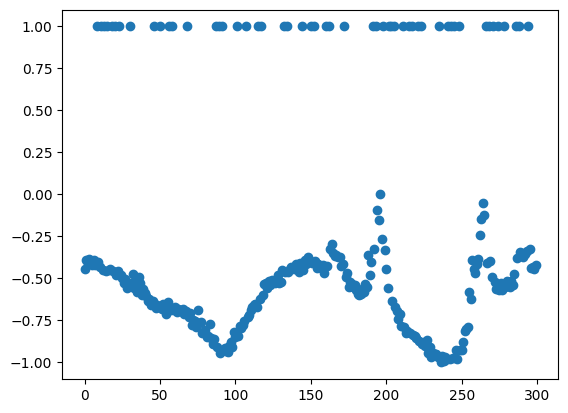

In [77]:
plt.scatter(list(range(300)), -test_data[7, 0, :].detach().cpu().numpy())

In [24]:
cfg.data_config.labels[4]

'globalstar'

In [35]:
torch.sum(test_data[0] == -1) / 300

tensor(0.2333, device='cuda:0')

In [29]:
np.mean(t.val_set.data[0]), np.std(t.val_set.data[0])

(0.4189750692514971, 0.19999266221423792)

In [36]:
torch.mean(test_data[0][test_data[0] != -1]), torch.std(test_data[0][test_data[0] != -1])

(tensor(0.3947, device='cuda:0', dtype=torch.float64),
 tensor(0.2815, device='cuda:0', dtype=torch.float64))